In [16]:
# Import required libraries for scientific computing and plotting
import numpy as np  # Numerical operations and array handling
import matplotlib.pyplot as plt  # Plotting and visualization
from scipy.optimize import curve_fit  # Curve fitting for data analysis
from scipy.stats import binom  # Binomial distribution functions

In [17]:
# Define marker/color sets and a consistent mapping from chain count -> marker/color
# This ensures consistent visual representation across different plots

# List of plot markers and colors for different chain counts
markers=['o', 's', '^', 'D', 'v']  # Circle, square, triangle, diamond, inverted triangle
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# canonical order of chains used in many plots
canonical_chains = [1, 2, 5, 10, 20]

# mapping: chain count -> marker/color (keeps visuals consistent across cells)
# Create dictionaries that map each chain count to its corresponding marker and color
marker_map = {chain: markers[i] for i, chain in enumerate(canonical_chains) if i < len(markers)}
color_map = {chain: colors[i] for i, chain in enumerate(canonical_chains) if i < len(colors)}

# Helper function to get marker for a specific chain count with fallback
def get_marker(chain, fallback=None):
    if fallback is None:
        fallback = markers[0] if markers else 'o'
    return marker_map.get(chain, fallback)

# Helper function to get color for a specific chain count with fallback
def get_color(chain, fallback=None):
    if fallback is None:
        fallback = colors[0] if colors else 'k'
    return color_map.get(chain, fallback)

In [18]:
# Load autocorrelation data from file (skip first line which is the header)
SI_autocorrelation = np.loadtxt('autocorrelation_100x100x100_1linear.dat', skiprows=1)
# Define the mean-field theoretical value of q
qbar=5/9

Saved 01_autocorrelation.pdf


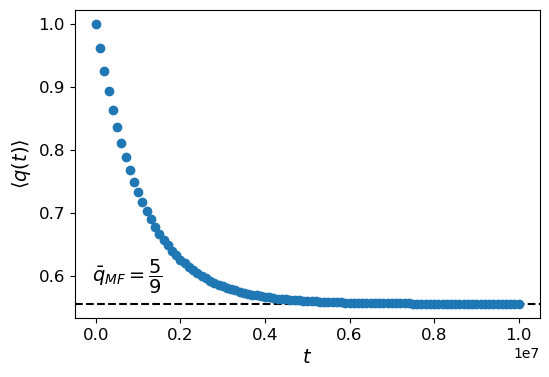

In [19]:
# Plot autocorrelation function <q(t)> vs time
plt.figure(figsize=(6, 4))
# Plot data with error bars: time vs. average q value with uncertainty
plt.errorbar(SI_autocorrelation[:, 0], SI_autocorrelation[:, 1], yerr=SI_autocorrelation[:, 2], fmt='o', ecolor='r', capthick=2, zorder=-1)
# Add horizontal reference line showing the mean-field value
plt.axhline(y=qbar, color='k', linestyle='--', label=r'$\langle q \rangle = \dfrac{5}{9}$', zorder=-2)
# Add text annotation for the mean-field value
plt.text(-100000, 0.59, r'$\bar{q}_{MF} = \dfrac{5}{9}$', fontsize=14)
plt.xlabel(r'$t$', fontsize=14)  # Time axis
plt.ylabel(r'$\langle q(t) \rangle$', fontsize=14)  # Average q value
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
out = '01_autocorrelation.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

Saved 02_Ct.pdf


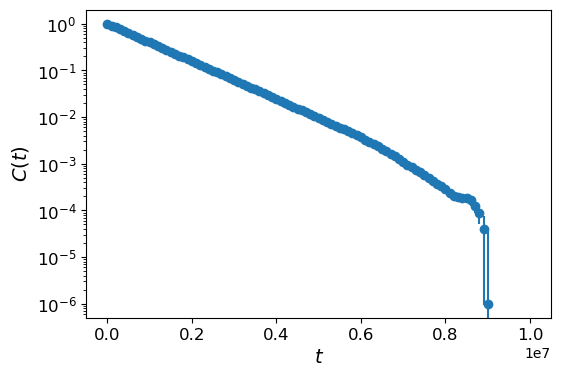

In [20]:
# Plot normalized correlation function C(t) = (q(t) - qbar) / (1 - qbar)
# This shows the relaxation behavior on a log scale
plt.figure(figsize=(6, 4))
# Normalize the autocorrelation data to get C(t)
plt.errorbar(SI_autocorrelation[:, 0], (SI_autocorrelation[:, 1]-qbar)/(1-qbar), yerr=SI_autocorrelation[:, 2], fmt='o', zorder=-1)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$C(t)$', fontsize=14)
#plt.xscale('log')
plt.yscale('log')  # Use log scale for y-axis to see decay behavior
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
out = '02_Ct.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [21]:
# Define system sizes and load rejection rate data for each size
sizes=['10x10x10', '20x20x20', '50x50x50', '100x100x100', '150x150x150']
data = {}
# Volume for each system size
V = [1000, 8000, 125000, 1000000, 3375000]
# Load rejection rate data for each system size
for size in sizes:
    data[size] = np.loadtxt(f'rejection_rate_{size}.dat', skiprows=1)
# Number of different chain counts and their values
n_chains=5
chains=[1,2,5,10,20]

Saved 04_rejection_V.pdf


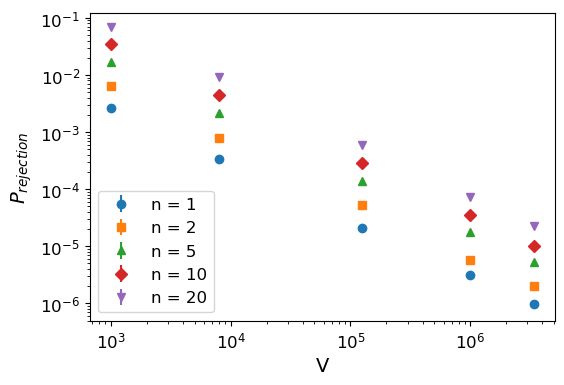

In [22]:
# Plot rejection probability vs. volume V for different chain counts
# Shows how rejection rate scales with system size
plt.figure(figsize=(6, 4))
# Use chain-based marker/color mapping so same n uses same visuals
# Plot all points except the last system size (without labels)
for i in range(len(sizes)-1):
    for j in range(len(V)):
        chain = chains[j]
        m = get_marker(chain)
        c = get_color(chain)
        plt.errorbar(V[i], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], marker=m, color=c, markersize=6, linestyle='None')
# For the last system size, add labels for legend
i = len(sizes)-1
j = 0
# label first point for legend (use chain-based visuals)
chain = chains[j]
m = get_marker(chain)
c = get_color(chain)
plt.errorbar(V[i], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], marker=m, color=c, markersize=6, linestyle='None', label=f'n = {chain}')
# Add remaining points with labels
for j in range(1,len(V)):
    chain = chains[j]
    m = get_marker(chain)
    c = get_color(chain)
    plt.errorbar(V[i], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], marker=m, color=c, markersize=6, linestyle='None', label=f'n = {chain}')
plt.xlabel('V', fontsize=14)
plt.ylabel(r'$P_{rejection}$', fontsize=14)
plt.legend(loc='lower left',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')  # Log-log plot to see power law behavior
plt.yscale('log')
out = '04_rejection_V.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

Saved 05_rejection_n.pdf


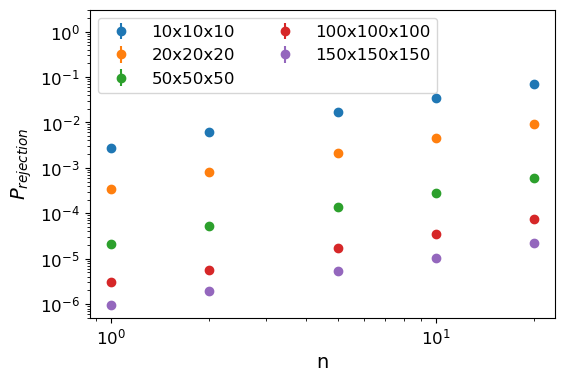

In [23]:
# Plot rejection probability vs. number of chains n for different system sizes
# Shows how rejection rate depends on chain count
plt.figure(figsize=(6, 4))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
# Plot all points except the last chain count (without labels)
for j in range(len(V)-1):
    for i in range(len(sizes)):
        plt.errorbar(chains[j], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], color=colors[i], fmt='o')
# For the last chain count, add labels for legend
j = len(V)-1
i=0
plt.errorbar(chains[j], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], color=colors[i], fmt='o', label=f'{sizes[i]}')
# Add remaining system sizes with labels
for i in range(1,len(chains)):
    plt.errorbar(chains[j], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], color=colors[i], fmt='o', label=f'{sizes[i]}')
plt.xlabel('n', fontsize=14)
plt.ylabel(r'$P_{rejection}$', fontsize=14)
plt.legend(loc='upper left',ncol=2, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')  # Log-log plot
plt.yscale('log')
plt.ylim(5e-7,3)  # Set y-axis limits
out = '05_rejection_n.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [24]:
# Load linking number (Lk) data from two different files
# Data 1: approximation distribution for 100x100x100 system
lk_data_1 = np.loadtxt('lk_int_approx_distribution_100x100x100_100blocks.dat')
# Data 2: original vs simplified comparison for 10x10x10 system
lk_data_2 = np.loadtxt('lk_original_simplified_10x10x10_test.dat', skiprows=1)

Saved 06_lg_data1.pdf


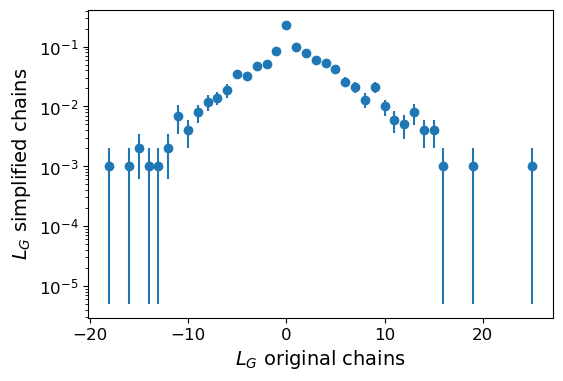

In [25]:
# Plot comparison of linking number (L_G) between original and simplified chains
# Shows the relationship between the two calculation methods
plt.figure(figsize=(6, 4))
# Plot L_G of original chains vs. L_G of simplified chains
plt.errorbar(lk_data_1[:,0], lk_data_1[:,1], yerr=lk_data_1[:,2], fmt='o', color='tab:blue')
plt.xlabel(r'$L_G$ original chains', fontsize=14)
plt.ylabel(r'$L_G$ simplified chains', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')  # Log scale for y-axis
out = '06_lg_data1.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

Saved 07_lg_data2.pdf


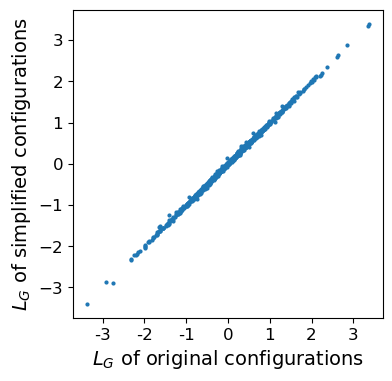

In [26]:
# Scatter plot of exact L_G vs. approximated L_G
# Shows the accuracy of the approximation method
plt.figure(figsize=(4, 4))
plt.scatter(lk_data_2[:,0], lk_data_2[:,1], s=4)  # Small scatter points
plt.xlabel(r'$L_G$ of original configurations', fontsize=14)
plt.ylabel(r'$L_G$ of simplified configurations', fontsize=14)
plt.xticks([-3, -2, -1, 0, 1, 2, 3], [-3, -2, -1, 0, 1, 2, 3],fontsize=12)
plt.yticks(fontsize=12)
out = '07_lg_data2.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [27]:
# Load multiplicity data from configuration files
# This data shows the frequency of different microstates
multiplicity_data_3x3_1 = np.loadtxt('configs_3x3_1linear_sorted.dat', skiprows=1)[:,1]
multiplicity_data_3x3_2 = np.loadtxt('configs_3x3_2linear_sorted.dat', skiprows=1)[:,1]
multiplicity_data_4x4 = np.loadtxt('configs_4x4_1linear_sorted.dat', skiprows=1)[:,1]

In [28]:
# Normalize multiplicity data to get probabilities
# Convert raw counts to probability distributions

# Process 3x3 system with 1 linear chain
multiplicity_3x3_1=np.array(multiplicity_data_3x3_1)
sumMult_3x3=sum(multiplicity_3x3_1)  # Total count
multiplicity_3x3_1=multiplicity_3x3_1/sumMult_3x3  # Normalize

# Process 3x3 system with 2 linear chains
multiplicity_3x3_2=np.array(multiplicity_data_3x3_2)
sumMult_3x3=sum(multiplicity_3x3_2)
multiplicity_3x3_2=multiplicity_3x3_2/sumMult_3x3

# Process 4x4 system with 1 linear chain
multiplicity_4x4=np.array(multiplicity_data_4x4)
sumMult_4x4=sum(multiplicity_4x4)
multiplicity_4x4=multiplicity_4x4/sumMult_4x4

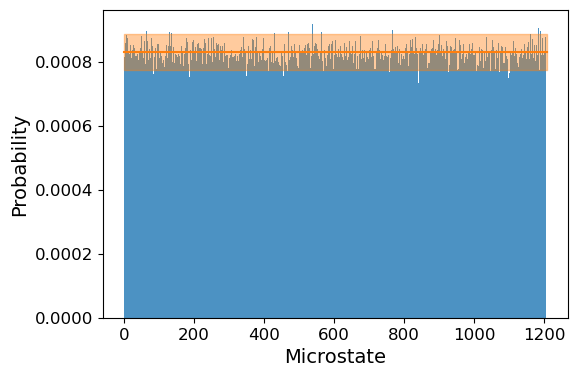

In [29]:
# Plot microstate probability distribution for 3x3 system with 1 linear chain
# Test for uniform distribution (ergodicity test)
plt.figure(figsize=(6,4))
# Create histogram showing probability of each microstate
plt.hist([i for i in range(1,len(multiplicity_3x3_1)+1)], bins=[0.5+i for i in range(len(multiplicity_3x3_1)+1)], weights=multiplicity_3x3_1, alpha=0.8)
# Calculate expected uniform probability (if all states are equally likely)
yline=1/len(multiplicity_3x3_1)
yerror=np.sqrt(sumMult_3x3/len(multiplicity_3x3_1))/sumMult_3x3
# Plot horizontal line showing expected uniform distribution with error band
plt.plot([0, len(multiplicity_3x3_1)+2], [yline, yline], color='tab:orange')
plt.fill_between([0, len(multiplicity_3x3_1)+2], [yline-yerror,yline-yerror], [yline+yerror,yline+yerror], color='tab:orange', alpha=0.4)
plt.xlabel('Microstate', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

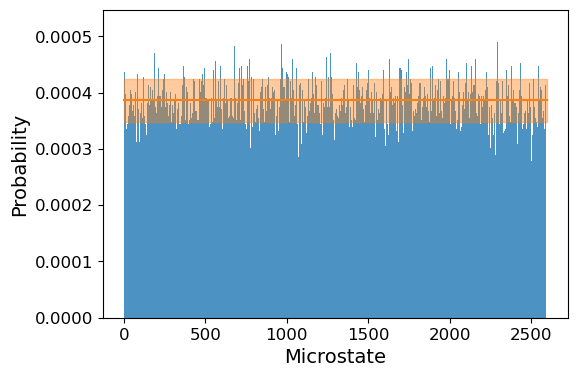

In [30]:
# Plot microstate probability distribution for 3x3 system with 2 linear chains
plt.figure(figsize=(6,4))
# Create histogram showing probability of each microstate
plt.hist([i for i in range(1,len(multiplicity_3x3_2)+1)], bins=[0.5+i for i in range(len(multiplicity_3x3_2)+1)], weights=multiplicity_3x3_2, alpha=0.8)
# Calculate expected uniform probability
yline=1/len(multiplicity_3x3_2)
yerror=np.sqrt(sumMult_3x3/len(multiplicity_3x3_2))/sumMult_3x3
# Plot horizontal line showing expected uniform distribution with error band
plt.plot([0, len(multiplicity_3x3_2)+2], [yline, yline], color='tab:orange')
plt.fill_between([0, len(multiplicity_3x3_2)+2], [yline-yerror,yline-yerror], [yline+yerror,yline+yerror], color='tab:orange', alpha=0.4)
plt.xlabel('Microstate', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

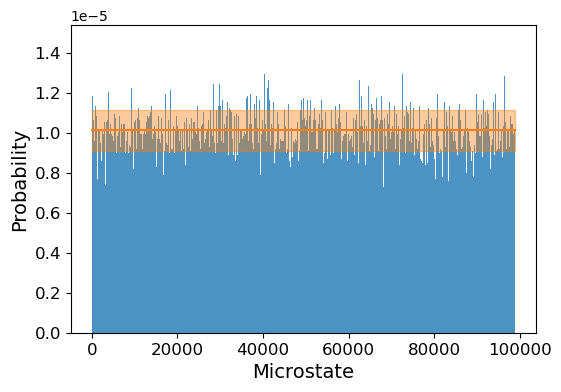

In [31]:
# Plot microstate probability distribution for 4x4 system with 1 linear chain
plt.figure(figsize=(6,4))
# Create histogram showing probability of each microstate
plt.hist([i for i in range(1,len(multiplicity_4x4)+1)], bins=[0.5+i for i in range(len(multiplicity_4x4)+1)], weights=multiplicity_4x4, alpha=0.8)
# Calculate expected uniform probability
yline=1/len(multiplicity_4x4)
yerror=np.sqrt(sumMult_4x4/len(multiplicity_4x4))/sumMult_4x4
# Plot horizontal line showing expected uniform distribution with error band
plt.plot([0, len(multiplicity_4x4)+2], [yline, yline], color='tab:orange')
plt.fill_between([0, len(multiplicity_4x4)+2], [yline-yerror,yline-yerror], [yline+yerror,yline+yerror], color='tab:orange', alpha=0.4)
plt.xlabel('Microstate', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [32]:
# Count the unique multiplicity values and their frequencies
unique, counts = np.unique(multiplicity_data_4x4, return_counts=True)

# Calculate parameters for binomial distribution comparison
M = int(len(multiplicity_data_4x4))  # Number of microstates
K=int(np.sum(multiplicity_data_4x4))  # Total number of observations
p=1/M  # Probability of each microstate (assuming uniform distribution)

# Calculate predicted counts using binomial distribution
# Use stable binomial pmf (probability mass function) to avoid numerical overflow
prediction_counts = []
k_vals = np.arange(int(unique[0]), int(unique[-1]) + 1)  # Range of k values
prediction_counts = binom.pmf(k_vals, K, p) * M  # Expected number of states with each multiplicity

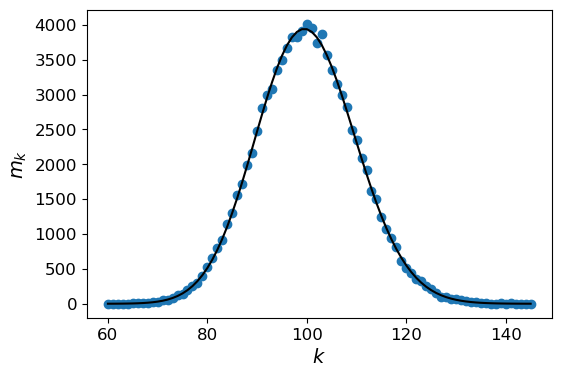

In [33]:
# Plot the distribution of multiplicities m_k vs. k
# Shows how many microstates have each multiplicity value
plt.figure(figsize=(6,4))
plt.plot(unique, counts, 'o')  # Plot observed counts
plt.plot(k_vals, prediction_counts, 'k')  # Plot predicted counts from binomial distribution
plt.xlabel(r'$k$', fontsize=14)  # Multiplicity value
plt.ylabel(r'$m_k$', fontsize=14)  # Number of states with that multiplicity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [34]:
# Load chain length distribution data for different numbers of linear chains
# All data is for the same system size (100x100x100) at 90-91% density
chains=[2,5,10,20]
data={}
for chain in chains:
    data[chain] = np.loadtxt(f'distribution_one_length_100x100x100_{chain}linear_density_90%_91%.dat', skiprows=1)

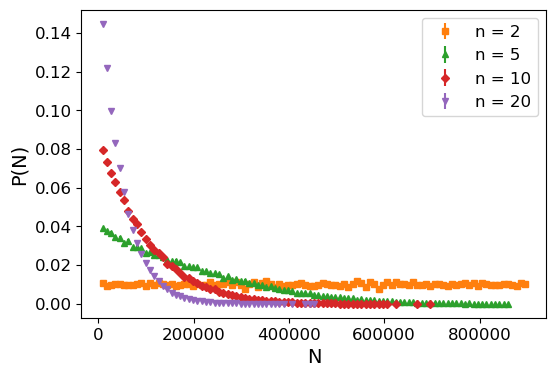

In [35]:
# Plot chain length distribution P(N) for different numbers of chains
# Shows probability distribution of chain lengths
plt.figure(figsize=(6,4))
for chain in chains:
    x = data[chain][:,0]  # Chain length N
    y = data[chain][:,1]  # Probability P(N)
    err = data[chain][:,2]  # Uncertainty in P(N)
    m = get_marker(chain)
    c = get_color(chain)
    plt.errorbar(x, y, yerr=err, marker=m, color=c, markersize=4, linestyle='None', label=f'n = {chain}')
plt.xlabel('N', fontsize=14)
plt.ylabel('P(N)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('Figure_SI_chain_length_distribution.pdf', dpi=300,  bbox_inches='tight')
plt.show()

In [36]:
# Load all linear density distribution files from a folder
# Look for the files in the folder called linear_density_distribution, make a list of them and read the data from them
import os
folder = 'linear_density_distribution'
files = [f for f in os.listdir('.') if f.endswith('.dat') and f.startswith('linear_density_distribution_')]
data = {}
# Parse filenames to extract system size L and chain count n
for f in files:
    print(f)
    # Extract L and n from filename
    name=f.strip('linear_adaptive_binning.dat').strip('linear_density_distribution_').split('x')[-1]
    L, n = map(int, name.split('_'))
    data[(L, n)] = np.loadtxt(f, skiprows=2)

linear_density_distribution_10x10x10_1linear_adaptive_binning.dat
linear_density_distribution_20x20x20_2linear_adaptive_binning.dat
linear_density_distribution_50x50x50_1linear_adaptive_binning.dat
linear_density_distribution_100x100x100_2linear_adaptive_binning.dat
linear_density_distribution_150x150x150_2linear_adaptive_binning.dat
linear_density_distribution_50x50x50_2linear_adaptive_binning.dat
linear_density_distribution_20x20x20_1linear_adaptive_binning.dat
linear_density_distribution_10x10x10_2linear_adaptive_binning.dat
linear_density_distribution_100x100x100_1linear_adaptive_binning.dat
linear_density_distribution_150x150x150_1linear_adaptive_binning.dat


Saved 09_linear_density_distributions1.pdf


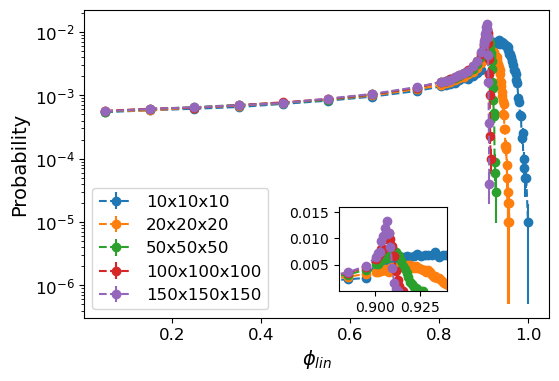

Saved 09_linear_density_distributions2.pdf


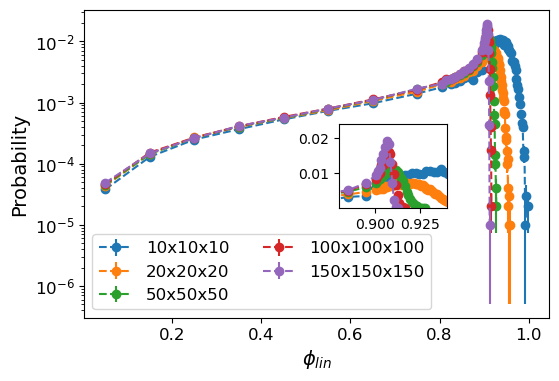

In [37]:
# Plot linear density distributions for n=1 and n=2 across different system sizes
# Shows probability distribution of linear chain volume fraction
# Plot all the density distributions
plt.figure(figsize=(6,4))
# Plot the data sorted with n=1
for L in sorted(set(key[0] for key in data.keys())):
    # Calculate bin centers and plot with error bars
    plt.errorbar(0.5*(data[(L, 1)][:,0]+data[(L, 1)][:,1]), data[(L, 1)][:,2], yerr=data[(L, 1)][:,3], linestyle='--',fmt='o', label=f'{L}x{L}x{L}')

plt.legend(loc='lower left', fontsize=12)
plt.xlabel(r'$\phi_{lin}$', fontsize=14)  # Linear chain volume fraction
plt.ylabel('Probability', fontsize=14)
plt.yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
## Make an insert with a zoom in the region [0.8, 0.95] x [1e-4, 2e-2]
# Add inset zooming into high-density region
plt.axes([0.55, 0.178, 0.18, 0.21])
for L in sorted(set(key[0] for key in data.keys())):
    x = 0.5*(data[(L, 1)][:,0]+data[(L, 1)][:,1])
    y = data[(L, 1)][:,2]
    y_err = data[(L, 1)][:,3]
    plt.errorbar(x, y, yerr=y_err, fmt='--o')
    plt.xlim(0.88, 0.94)
    plt.ylim(1e-4, 1.6e-2)

out = '09_linear_density_distributions1.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

# Plot all the density distributions
plt.figure(figsize=(6,4))
# Plot the data sorted with n=2
for L in sorted(set(key[0] for key in data.keys())):
    plt.errorbar(0.5*(data[(L, 2)][:,0]+data[(L, 2)][:,1]), data[(L, 2)][:,2], yerr=data[(L, 2)][:,3], linestyle='--',fmt='o', label=f'{L}x{L}x{L}')
plt.xlabel(r'$\phi_{lin}$', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.yscale('log')
plt.legend(loc='lower left', ncol=2, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
## Make an insert with a zoom in the region [0.8, 0.95] x [1e-4, 2e-2]
plt.axes([0.55, 0.385, 0.18, 0.21])
for L in sorted(set(key[0] for key in data.keys())):
    x = 0.5*(data[(L, 2)][:,0]+data[(L, 2)][:,1])
    y = data[(L, 2)][:,2]
    y_err = data[(L, 2)][:,3]
    plt.errorbar(x, y, yerr=y_err, fmt='--o')
    plt.xlim(0.88, 0.94)
    plt.ylim(1e-4, 2.4e-2)

out = '09_linear_density_distributions2.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [38]:
# Load mean linear chain length data from folder
# Look for the files in the folder called mean_linear_lengths, make a list of them and read the data from them
folder = 'mean_linear_lengths'
files = [f for f in os.listdir('.') if f.endswith('.dat') and f.startswith('mean_linear_length_')]
data = {}
# Parse filenames to extract number of linear chains n
for f in files:
    print(f)
    x=int(f.strip('mean_linear_length_').split('linear')[0])  # Extract n from filename
    data[x] = np.loadtxt(f, skiprows=2, usecols=(1,2,3))

mean_linear_length_1linear_density_90%_91%.dat
mean_linear_length_5linear_density_90%_91%.dat
mean_linear_length_10linear_density_90%_91%.dat
mean_linear_length_2linear_density_90%_91%.dat


In [39]:
# Define linear function for fitting: y = a * x
def linear_func(x, a):
    return a * x

In [40]:
# Define symbol shapes for plotting different data series
symbols=['o','s', '^', 'D', 'v']

Saved 10_mean_linear_lengths.pdf


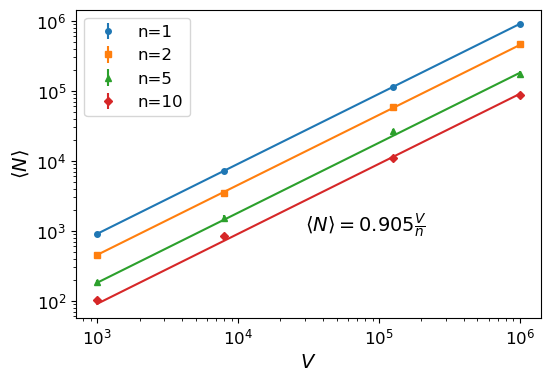

In [41]:
# Plot mean linear chain length <N> vs. volume V for different n
# Shows the relationship <N> = 0.905 * V/n
plt.figure(figsize=(6,4))
i=0
for n in sorted(data.keys()):
    xdata = data[n][:,0]/n  # Normalize by n
    ydata = data[n][:,1]  # Mean length
    xfit = np.linspace(min(xdata)*n, max(xdata)*n, 100)
    # Plot data points with error bars
    plt.errorbar(data[n][:,0], data[n][:,1], yerr=data[n][:,2], linestyle='',fmt=symbols[i], markersize=4,label=f'n={n}')
    # Plot theoretical line: <N> = 0.905 * V/n
    plt.plot(xfit, 0.905*xfit/n, c=get_color(n))
    i+=1
    
plt.text(3e4, 1e3, r'$\langle N \rangle = 0.905 \frac{V}{n}$', fontsize=14)
plt.xlabel(r'$V$', fontsize=14)
plt.ylabel(r'$\langle N \rangle$', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.yscale('log')
out = '10_mean_linear_lengths.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [42]:
# Load comprehensive data for polymer chain analysis
# Includes end-to-end distance, overlaps, contacts, etc.
chains=[1, 2,5,10,20]
data_reesq={}  # End-to-end distance squared
data_noverlap={}  # Number of overlapping chains
data_interchain={}  # Inter-chain contacts
data_ncontacts={}  # Contact probability

# Load end-to-end distance squared data for all chain counts
for chain in chains:
    data_reesq[chain]=np.loadtxt(f"reesq_50x50x50_{chain}linear.dat")

# Load inter-chain contact data (different file for n=1)
data_interchain[1]=np.loadtxt("inter_chain_contacts_1linear.dat")
data_interchain[2]=np.loadtxt(f"inter_chain_contacts_50x50x50_2linear_length_56563_pm10%.dat", skiprows=1)
data_interchain[5]=np.loadtxt(f"inter_chain_contacts_50x50x50_5linear_length_22625_pm10%.dat", skiprows=1)
data_interchain[10]=np.loadtxt(f"inter_chain_contacts_50x50x50_10linear_length_11313_pm10%.dat", skiprows=1)
data_interchain[20]=np.loadtxt(f"inter_chain_contacts_50x50x50_20linear_length_5656_pm10%.dat", skiprows=1)

# Load overlapping chains data
data_noverlap[1]=np.loadtxt("n_overlapping_self_replicas_vs_length_1linear.dat")
data_noverlap[2]=np.loadtxt(f"n_overlapping_chains_50x50x50_2linear_length_56563_pm10%.dat")
data_noverlap[5]=np.loadtxt(f"n_overlapping_chains_50x50x50_5linear_length_22625_pm10%.dat")
data_noverlap[10]=np.loadtxt(f"n_overlapping_chains_50x50x50_10linear_length_11313_pm10%.dat")
data_noverlap[20]=np.loadtxt(f"n_overlapping_chains_50x50x50_20linear_length_5656_pm10%.dat")

# Load contact probability data for all chain counts
data_ncontacts[1]=np.loadtxt(f"contact_probability_50x50x50_1linear.dat")
data_ncontacts[2]=np.loadtxt(f"contact_probability_50x50x50_2linear.dat", skiprows=1)
data_ncontacts[5]=np.loadtxt(f"contact_probability_50x50x50_5linear.dat", skiprows=1)
data_ncontacts[10]=np.loadtxt(f"contact_probability_50x50x50_10linear.dat", skiprows=1)
data_ncontacts[20]=np.loadtxt(f"contact_probability_50x50x50_20linear.dat", skiprows=1)

In [43]:
# Define power law function for fitting: y = a * x^b
def power_law(x, a, b):
    return a * x**b

In [44]:
# Load data for Figure S7 from organized subfolder structure
# Look for the files in the folder called mean_linear_lengths, make a list of them and read the data from them

# Load contact probability and Re^2 data for Figure S7a (varying system size)
contacts1 = {}
reesq1 = {}
files = [f for f in os.listdir('.') if f.startswith('s7a') and f.endswith('.dat')]
for f in files:
    if f.startswith('s7a_contact_probability_'):
        # Parse filename to extract L and n
        x=f.strip('s7a_contact_probability_')
        n=int(x.split('_')[1].split('linear')[0])
        L=int(x.split('x')[0])
        contacts1[(L,n)] = np.loadtxt(f, skiprows=1)
    elif f.startswith('s7a_reesq_'):
        x=f.strip('s7a_reesq_')
        n=int(x.split('_')[1].split('linear')[0])
        L=int(x.split('x')[0])
        reesq1[(L,n)] = np.loadtxt(f, skiprows=1)

# Load contact probability and Re^2 data for Figure S7b (varying n)
contacts2 = {}
reesq2 = {}
files = [f for f in os.listdir('.') if f.startswith('s7b') and f.endswith('.dat')]
for f in files:
    print(f)
    if f.startswith('s7b_contact_probability_'):
        x=f.strip('s7b_contact_probability_')
        n=int(x.split('_')[1].split('linear')[0])
        L=int(x.split('x')[0])
        contacts2[(L,n)] = np.loadtxt(f, skiprows=1)
    elif f.startswith('s7b_reesq_'):
        x=f.strip('s7b_reesq_')
        n=int(x.split('_')[1].split('linear')[0])
        L=int(x.split('x')[0])
        reesq2[(L,n)] = np.loadtxt(f, skiprows=1)

# Load inter-chain contacts and overlapping chains data for Figure S7c
data3 = np.loadtxt('inter_contacts_overlapping_chains_1linear.dat', skiprows=1, usecols=(1,2,3,4,5))

s7b_contact_probability_50x50x50_10linear.dat
s7b_contact_probability_150x150x150_1linear.dat
s7b_reesq_150x150x150_1linear.dat
s7b_contact_probability_10x10x10_1linear.dat
s7b_contact_probability_50x50x50_2linear.dat
s7b_reesq_50x50x50_20linear.dat
s7b_contact_probability_50x50x50_5linear.dat
s7b_contact_probability_20x20x20_1linear.dat
s7b_reesq_50x50x50_1linear.dat
s7b_contact_probability_100x100x100_1linear.dat
s7b_reesq_100x100x100_1linear.dat
s7b_reesq_10x10x10_1linear.dat
s7b_reesq_50x50x50_2linear.dat
s7b_reesq_50x50x50_5linear.dat
s7b_reesq_20x20x20_1linear.dat
s7b_reesq_50x50x50_10linear.dat
s7b_contact_probability_50x50x50_20linear.dat
s7b_contact_probability_50x50x50_1linear.dat


In [45]:
# Define consistent plot symbols and colors for different system sizes
symbol_map = {"10x10x10": 'o', "20x20x20": 's', "50x50x50": '^', "100x100x100": 'D', "150x150x150": 'v'}  # plot markers
color_map = {"10x10x10": 'tab:blue', "20x20x20": 'tab:orange', "50x50x50": 'tab:green', "100x100x100": 'tab:red', "150x150x150": 'tab:purple'}  # consistent colors

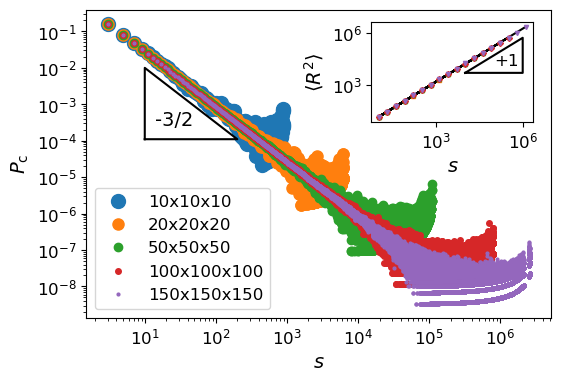

In [46]:
# Figure S7a: Contact probability vs. sequence separation for different system sizes (n=1)
# Main plot shows P_c(s) scaling with -3/2 power law
# Inset shows <R_ee^2>(s) scaling with +1 power law
fig, ax1 = plt.subplots(figsize=(6, 4))
i=10
for L in sorted(set(key[0] for key in contacts1.keys())):
    # Plot Pc(s) per system size using distinct markers
    ax1.plot(contacts1[(L,1)][:,0], contacts1[(L,1)][:,1], 'o', markersize=i, label=f'{L}x{L}x{L}', zorder=-i)
    i-=2

# Slope guide triangle indicating -3/2 scaling
ax1.plot([10, 200, 10, 10], [1.1*10**-4, 1.1*10**-4, 1*10**-2, 1.1*10**-4], '-', color='k', zorder=-10)
ax1.text(14, 2.5*10**-4, "-3/2", fontsize=14)
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel(r'$s$', fontsize=14)
ax1.set_ylabel(r'$P_{\rm c}$', fontsize=14)
ax1.legend(fontsize=12, loc="lower left")
# Inset: plot <Ree^2>(s) with error bars and a log-log fit
ax2 = fig.add_axes([0.6, 0.6, 0.27, 0.25])
i=3
for L in sorted(set(key[0] for key in contacts1.keys())):
    ax2.errorbar(reesq1[(L,1)][:,0], reesq1[(L,1)][:,1], yerr=reesq1[(L,1)][:,2], 
                 marker=symbol_map[f'{L}x{L}x{L}'], markersize=3, linestyle='None', 
                 color=color_map[f'{L}x{L}x{L}'], zorder=i)
    i+=2
for L in sorted(set(key[0] for key in contacts1.keys())):
    ax2.plot(reesq1[(L,1)][:,0], reesq1[(L,1)][:,1], color=color_map[f'{L}x{L}x{L}'], zorder=i, linestyle='None')
    i+=4
# Combine all data and fit with power law in log-log space
x = np.concatenate([reesq1[(L,1)][:,0] for L in sorted(set(key[0] for key in contacts1.keys()))])  # concat s
y = np.concatenate([reesq1[(L,1)][:,1] for L in sorted(set(key[0] for key in contacts1.keys()))])  # concat <Ree^2>
z = np.polyfit(np.log(x), np.log(y), 1)  # slope on log-log
p = np.poly1d(z)
ax2.plot(x, np.exp(p(np.log(x))), 'k', zorder=-10)  # fitted line
# Slope guide (+1)
ax2.plot([10**4, 10**6,10**6, 10**4], [0.5*10**4, 0.5*10**4, 0.5*10**6, 0.5*10**4], '-', color='k', zorder=-10)
ax2.text(10**5, 1.2*10**4, r"+1", fontsize=12)
ax2.set_xscale('log'); 

ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'$s$', fontsize=14)
ax2.set_ylabel(r'$\langle R^2\rangle$', fontsize=14)
plt.savefig("Contact_probability_seqsep_and_Ree_seqsep1.pdf", dpi=300, bbox_inches='tight')
plt.show()

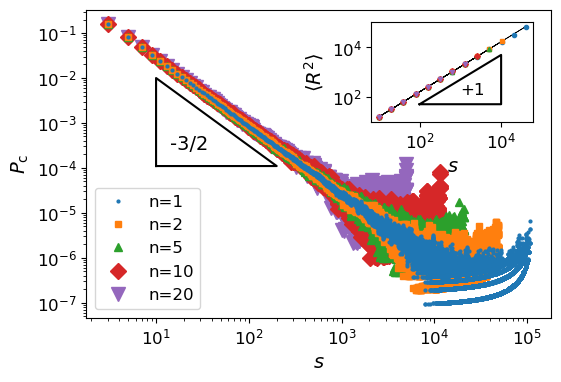

In [60]:
# Figure S7b: Contact probability vs. sequence separation for different n (L=50)
# Main plot shows P_c(s) scaling with -3/2 power law
# Inset shows <R_ee^2>(s) scaling with +1 power law
symbols = ['o','s', '^', 'D', 'v']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

fig, ax1 = plt.subplots(figsize=(6, 4))
i=2
j=0
for n in sorted(set(key[1] for key in contacts2.keys())):
    # Plot Pc(s) per system size using distinct markers
    ax1.plot(contacts2[(50,n)][:,0], contacts2[(50,n)][:,1], symbols[j], markersize=i, label=f'n={n}', zorder=-i)
    i+=2
    j+=1

# Slope guide triangle indicating -3/2 scaling
ax1.plot([10, 200, 10, 10], [1.1*10**-4, 1.1*10**-4, 1*10**-2, 1.1*10**-4], '-', color='k', zorder=-10)
ax1.text(14, 2.5*10**-4, "-3/2", fontsize=14)
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel(r'$s$', fontsize=14)
ax1.set_ylabel(r'$P_{\rm c}$', fontsize=14)
ax1.legend(fontsize=12, loc="lower left")
# Inset: plot <Ree^2>(s) with error bars and a log-log fit
ax2 = fig.add_axes([0.6, 0.6, 0.27, 0.25])
i=3

j=0
for n in sorted(set(key[1] for key in contacts2.keys())):
    ax2.errorbar(reesq2[(50,n)][:,0], reesq2[(50,n)][:,1], yerr=reesq2[(50,n)][:,2], 
                 marker=symbols[j], markersize=3, linestyle='None', 
                 color=colors[j], zorder=i)
    i+=2
    j+=1


# Combine all data and fit with power law in log-log space
x = np.concatenate([reesq2[(50,n)][:,0] for n in sorted(set(key[1] for key in contacts2.keys()))])  # concat s
y = np.concatenate([reesq2[(50,n)][:,1] for n in sorted(set(key[1] for key in contacts2.keys()))])  # concat <Ree^2>
z = np.polyfit(np.log(x), np.log(y), 1)  # slope on log-log
p = np.poly1d(z)
ax2.plot(x, np.exp(p(np.log(x))), 'k', linewidth=0.5, zorder=-10)  # fitted line
# Slope guide (+1)
ax2.plot([10**2, 10**4,10**4, 10**2], [0.5*10**2, 0.5*10**2, 0.5*10**4, 0.5*10**2], '-', color='k', zorder=-10)
ax2.text(10**3, 1.2*10**2, r"+1", fontsize=12)
ax2.set_xscale('log'); 

ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'$s$', fontsize=14)
ax2.set_ylabel(r'$\langle R^2\rangle$', fontsize=14)
plt.savefig("Contact_probability_seqsep_and_Ree_seqsep2.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# Define linear law function for fitting: y = a * x + b
def linear_law(x, a, b):
    return a * x + b

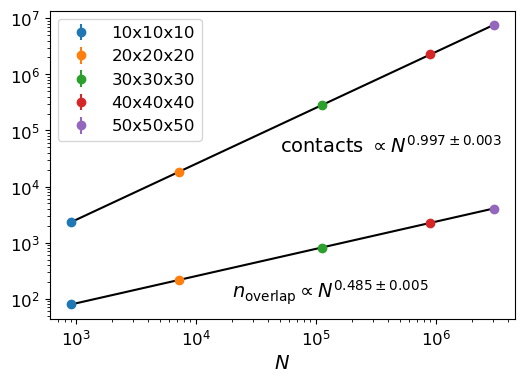

In [64]:
# Figure S7c: Inter-chain contacts and overlapping chains vs. chain length N
# Shows scaling: contacts ∝ N^1 and overlaps ∝ N^0.48
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

plt.figure(figsize=(6,4))
# Plot both contacts and overlaps for each system size
for i in range(5):
    # Contacts (first set of columns)
    plt.errorbar(data3[i,0], data3[i,1], yerr=data3[i,2], fmt='o', color=colors[i], label=f'{10*(i+1)}x{10*(i+1)}x{10*(i+1)}')
    # Overlaps (second set of columns)
    plt.errorbar(data3[i,0], data3[i,3], yerr=data3[i,4], fmt='o', color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Fit contacts data with power law (in log space: linear fit)
params, covariance = curve_fit(linear_law, np.log(data3[:,0]), np.log(data3[:,1]), absolute_sigma=False)

x_fit = np.linspace(min(data3[:,0]), max(data3[:,0]), 100)
y_fit = np.exp(linear_law(np.log(x_fit), *params))
plt.plot(x_fit, y_fit, 'k', zorder=-10)

# Fit overlap data with power law
params, covariance = curve_fit(linear_law, np.log(data3[:,0]), np.log(data3[:,3]), absolute_sigma=False)
x_fit = np.linspace(min(data3[:,0]), max(data3[:,0]), 100)
y_fit = np.exp(linear_law(np.log(x_fit), *params))
plt.plot(x_fit, y_fit, 'k', zorder=-10)

# Add text annotations showing the fitted power laws
plt.text(5e4, 4e4, r"contacts $\propto N^{0.997 \pm 0.003}$", color='k', fontsize=14)
plt.text(2e4, 1e2, r"$n_{\rm overlap} \propto N^{0.485 \pm 0.005}$", color='k', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=14)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("Contacts_and_noverlaps.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# Load relaxation time and CPU time data for Figure S8
data_tau_linear=np.loadtxt('tau_MC_1linear.dat')
data_cpu_time=np.loadtxt('cpu_time.dat')

# Extract columns for plotting
volume = data_tau_linear[:,0].astype(float)
tau = data_tau_linear[:, 1].astype(float)

volume2 = data_cpu_time[:,1].astype(float)
cpu_time = data_cpu_time[:, 2].astype(float)
cpu_time_error = data_cpu_time[:, 3].astype(float)

In [51]:
def fixed_linear_law1(x, b):
  return 1.003 * x + b

def fixed_linear_law2(x, b):
  return 1.08 * x + b

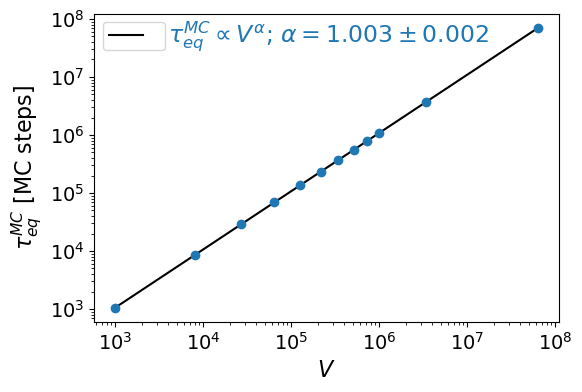

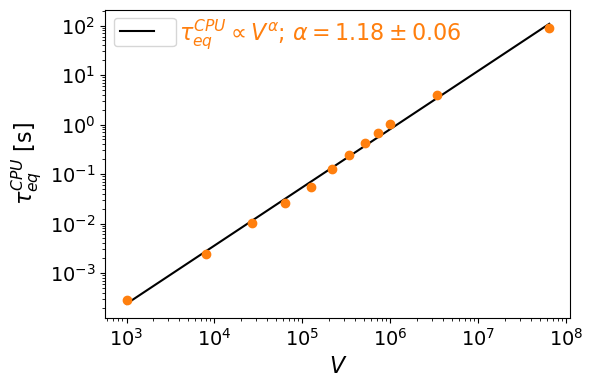

In [88]:
# Create a figure and axes
plt.figure(figsize=(6, 4))

# Plot Tau with error bars
plt.plot(volume, tau, 'o', color='tab:blue')

# Create a range of x values for the fit line
volume_fit = np.linspace(volume.min(), volume.max(), 100)

params, covariance = curve_fit(linear_law, np.log(volume), np.log(tau), absolute_sigma=False)
# Plot the power law fit line
plt.plot(volume_fit, np.exp(linear_law(np.log(volume_fit), *params)), color='k', label=r'$\,$', zorder=-10)

# Set labels for the axes
plt.xlabel(r'$V$', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.yticks([10**3, 10**4, 10**5, 10**6, 10**7, 10**8], labels=[r'$10^{3}$', r'$10^{4}$', r'$10^{5}$', r'$10^{6}$', r'$10^{7}$', r'$10^{8}$'])
plt.ylabel(r'$\tau_{eq}^{MC}$ [MC steps]', fontsize=16)
plt.text(4e3, 4*10**7, r'$\tau^{MC}_{eq} \propto V^{\alpha}$; $\alpha = 1.003 \pm 0.002$', color='tab:blue', fontsize=17)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.show()

# Create a figure and axes
plt.figure(figsize=(6, 4))

plt.plot(volume2, cpu_time, 'o', color='tab:orange')

# Create a range of x values for the fit line
params, covariance = curve_fit(linear_law, np.log(volume2), np.log(cpu_time), absolute_sigma=False)
volume_fit = np.linspace(volume2.min(), volume2.max(), 100)

plt.plot(volume_fit, np.exp(linear_law(np.log(volume_fit), *params)), color='k', label=r'$\,$', zorder=-10)
plt.xlabel(r'$V$', fontsize=16)
plt.ylabel(r'$\tau_{eq}^{CPU}$ [s]', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.text(4*10**3, 5*10**1, r'$\tau^{CPU}_{eq} \propto V^{\alpha}$; $\alpha = 1.18 \pm 0.06$', color='tab:orange', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
# Show the plot
plt.show()